In [1]:
from IPython.display import display
from vdom.helpers import h1, p, img, div, b, li, ul, h2, h3, h4, h5, a
from IPython.display import display, HTML

with open ("custom.css", "r") as myfile:
    custom_css = myfile.read().replace('\n', '')

title = '<h1>Olympic Games Analysis</h1>'
indexes = ({1: {'name': {'Introduction'}},
            2: {'name': {'Requirements'}},
            3: {'name': {'Data Cleaning'}},
            4: {'name': {'Male Analysis'}},
            5: {'name': {'Physique', 'Age', 'Winning Density based on physique'}},
            6: {'name': {'Female Analysis'}},
            7: {'name': {'Physique', 'Age', 'Winning Density based on physique'}},
            8: {'name': {'Gender Gap'}},
            9: {'name': {'Geographic Analysis'}},
            })
          
links =   ({1: {'link': {'#introduction'}},
            2: {'link': {'#requirements'}},
            3: {'link': {'#data_cleaning'}},
            4: {'link': {'#male_analysis'}},
            5: {'link': {'#physique_male', '#age_male', '#winning_male_density_physique'}},
            6: {'link': {'#female_analysis'}},
            7: {'link': {'#physique_female', '#age_female', '#winning_female_density_physique'}},
            8: {'link': {'#gender_gap'}},
            9: {'link': {'#geographic_analysis'}},
            })


def listIndex(indexes):
    html = custom_css
    html += title
    html += '<img src="img/olympics-animation.jpg">'
    html += '<ul class="unstyled">'
    
    for x in range(1, 9):
        try:
        
            index_len = len(indexes[x]['name'])
            if index_len > 1:
                html += '<ul>'
                pass
            for i, j in zip(indexes[x]['name'], links[x]['link']):
                html += '<li><a href="' + j + '">' + i + '</a></li>'
            if index_len > 1:
                html += '</ul>'
                pass
        except Exception:
            break
    html += '</ul>'
    
    return html

display(HTML(listIndex(indexes)))

<h1> Requirements </h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline

In [3]:

# Cumulative distribution function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    print(y)
    return x, y

# Calculate min and max of the data
def minmax(data):
    min_val = min(data)
    max_val = max(data)

    return (min_val, max_val)

# Calculate Variance and Standart Deviation
def varstd(data):
    variance = np.var(data)
    standart_dev = np.std(data)
    return (variance, standart_dev)

<h1>Each row represents an event by a particular athlete</h1>

In [4]:
csv_files = glob.glob('datasets/*.csv')
print(csv_files)
# Import the first dataset called "athlete_events.csv"
dataset = pd.read_csv(csv_files[0])
# Visualize a sample
dataset.sample(5)

['datasets\\athlete_events.csv', 'datasets\\noc_regions.csv']


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
244886,122618,Levent Tuncat,M,20.0,173.0,61.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Taekwondo,Taekwondo Men's Flyweight,NaN
228842,114913,Rolf Christian Eckersberg Stenersen,M,21.0,183.0,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's 4 x 100 metres Relay,NaN
106940,54062,Robertas Javtokas,M,28.0,211.0,117.0,Lithuania,LTU,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN
181114,91028,Umberto Panerai,M,27.0,187.0,80.0,Italy,ITA,1980 Summer,1980,Summer,Moskva,Water Polo,Water Polo Men's Water Polo,NaN
217579,109285,"Darina Serhivna ""Dar'ia"" Sharipova",F,18.0,174.0,62.0,Ukraine,UKR,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Women's Air Rifle, 10 metres",NaN


<h1>Stuff to know about the "athlete_events.csv" Dataset</h1>
<h3><b>Content</b></h3>
<p>The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:</p>
<p><b>ID</b> - Unique number for each athlete</p>
<p><b>Name</b> - Athlete's name</p>
<p><b>Sex</b> - M or F</p>
<p><b>Age</b> - Integer</p>
<p><b>Height</b> - In centimeters</p>
<p><b>Weight</b> - In kilograms</p>
<p><b>Team</b> - Team name</p>
<p><b>NOC</b> - National Olympic Committee 3-letter code</p>
<p><b>Games</b> - Year and season</p>
<p><b>Year</b> - Integer</p>
<p><b>Season</b> - Summer or Winter</p>
<p><b>City</b> - Host city</p>
<p><b>Sport</b> - Sport</p>
<p><b>Event</b> - Event</p>
<p><b>Medal</b> - Gold, Silver, Bronze, or NA</p>

<h1>Data types and attributes </h1>

In [5]:
dataset.columns = dataset.columns.str.lower()
print(dataset.info())
print(dataset.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
id        271116 non-null int64
name      271116 non-null object
sex       271116 non-null object
age       261642 non-null float64
height    210945 non-null float64
weight    208241 non-null float64
team      271116 non-null object
noc       271116 non-null object
games     271116 non-null object
year      271116 non-null int64
season    271116 non-null object
city      271116 non-null object
sport     271116 non-null object
event     271116 non-null object
medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None
Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')


<h1>Saving space by transforming the right data</h1>

In [6]:
# Transform data into categories
dataset[['sex', 'noc', 'medal', 'team']] = dataset[['sex', 'noc', 'medal', 'team']].astype('category')
df = dataset[['age', 'height', 'weight', 'year']]


# Transform numeric data, and removing all strings, errors="coerce" will transform invalid inputs to NaN
df = df.apply( pd.to_numeric, errors='coerce' )


dataset[['age', 'height', 'weight', 'year']] = df
# Remove data duplicates
dataset = dataset.drop_duplicates()
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
id        269731 non-null int64
name      269731 non-null object
sex       269731 non-null category
age       260416 non-null float64
height    210917 non-null float64
weight    208204 non-null float64
team      269731 non-null category
noc       269731 non-null category
games     269731 non-null object
year      269731 non-null int64
season    269731 non-null object
city      269731 non-null object
sport     269731 non-null object
event     269731 non-null object
medal     39772 non-null category
dtypes: category(4), float64(3), int64(2), object(6)
memory usage: 26.3+ MB
None


In [7]:
print('Before data regularization')
print(dataset[['age', 'height', 'weight', 'year']].isnull().sum())

columns = ['age', 'height', 'weight', 'year']
for column in columns:
    column_mean = dataset[column].mean()
    dataset[column] = dataset[column].fillna(column_mean)
    
print('\nAfter data regularization')
print(dataset[['age', 'height', 'weight', 'year']].isnull().sum())

Before data regularization
age        9315
height    58814
weight    61527
year          0
dtype: int64

After data regularization
age       0
height    0
weight    0
year      0
dtype: int64


<h1>Fulfill some curiousities about the data at hand</h1>

<h3>Conclusions from this analysis</h3>
<ul>
 <li>   
 <h4> Age </h4>
     <ul>   
         <li>Around 74% of the Athletes are older than 21</li>
         <li>The Median age is 24</li>
         <li>75% are younger than 28</li>
         <li>The mean age is 25</li>
         <li>The youngest athlete to ever participate was only 10</li>
         <li>The older athlete to ever participate was 97</li>
     </ul>    
    </li>
 <li>   
 <h4> Height </h4>
     <ul>   
         <li>Around 74% of the Athletes are taller than 168cm</li>
         <li>The Median height is 175cm</li>
         <li>75% are younger than 28</li>
         <li>The mean height is 175.33cm (really close to the median, which tells us there are few outliers in this feature)</li>
         <li>The shortest athlete to ever participate was only 127cm tall</li>
         <li>The tallest athlete to ever participate was 226cm tall</li>
     </ul>    
    </li>
  <li>   
 <h4> Weight </h4>
     <ul>   
         <li>Around 74% of the Athletes weight more than 60kg</li>
         <li>The Median weight is 70kg</li>
         <li>75% are weight less 79kg</li>
         <li>The mean weight is 70.70kg</li>
         <li>The lightest athlete to ever participate only weighted 25kg (Can it be related to the youngest athlete?) Check <a href="#">Here</a></li>
         <li>The heaviest athlete to ever participate had 214kg</li>
     </ul>    
    </li>
  
</ul>

In [8]:
dataset.describe()

,id,age,height,weight,year
count,269731.000000,269731.000000,269731.000000,269731.000000,269731.000000
mean,68264.949591,25.454776,175.338953,70.701778,1978.623073
std,39026.253843,6.056501,9.301313,12.606697,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,22.000000,170.000000,63.000000,1960.000000
50%,68233.000000,25.000000,175.338953,70.701778,1988.000000
75%,102111.000000,28.000000,180.000000,76.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


(269731,)
[3.70739737e-06 7.41479474e-06 1.11221921e-05 ... 9.99992585e-01
 9.99996293e-01 1.00000000e+00]
[3.70739737e-06 7.41479474e-06 1.11221921e-05 ... 9.99992585e-01
 9.99996293e-01 1.00000000e+00]
[3.70739737e-06 7.41479474e-06 1.11221921e-05 ... 9.99992585e-01
 9.99996293e-01 1.00000000e+00]


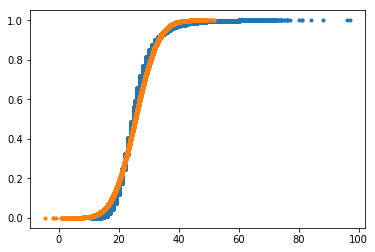

In [9]:
mu = np.mean(dataset['age'])
sigma = np.std(dataset['age'])
shape = dataset['age'].shape
print(shape)
testing_set = np.random.normal(mu, sigma, shape[0])
x_text, y_test = ecdf(testing_set)
x_text, y_test = ecdf(testing_set)
x, y = ecdf(dataset['age'])
plt.plot(x, y, linestyle='none', marker='.')
plt.plot(x_text, y_test, linestyle='none', marker='.')

In [10]:
dataset.isnull().sum()

id             0
name           0
sex            0
age            0
height         0
weight         0
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     229959
dtype: int64

In [11]:
print('Number of rows: ' + str(dataset.shape[0]))
print('Number of columns: ' + str(dataset.shape[1]))

Number of rows: 269731
Number of columns: 15


<h1> Frequency of Country Participation and Sport Activity </h1>

In [12]:
dataset.noc.value_counts(dropna=False).head()

USA    18604
FRA    12551
GBR    12115
ITA    10668
GER     9734
Name: noc, dtype: int64

In [13]:
dataset.sport.value_counts(dropna=False).head()

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10827
Name: sport, dtype: int64

<h1>Tidy Data</h1>

In [14]:
athlete_df = dataset[['name', 'team', 'noc']]

athlete_df = pd.melt(frame=athlete_df, id_vars='name', value_vars=['team', 'noc'], var_name='type', value_name='result')
athlete_df.head(5)

,name,type,result
0,A Dijiang,team,China
1,A Lamusi,team,China
2,Gunnar Nielsen Aaby,team,Denmark
3,Edgar Lindenau Aabye,team,Denmark/Sweden
4,Christine Jacoba Aaftink,team,Netherlands
